# aapineda

# River Flow Forecasting: A Hybrid Approach Integrating Machine Learning and Linear Time Series Models

![Alt text](1024px-Rio_Magdalena_Delta_landsat.jpg)

## **Resumen**


La precisa estimación del caudal del río Magdalena en la estación de Calamar, Bolívar, es esencial para la gestión de recursos hídricos y la reducción de riesgos de inundaciones en esta región. En este estudio, se emplearon tres enfoques de modelado para estimar el caudal del río a largo plazo (mensuales).
Los datos necesarios para este análisis fueron recopilados específicamente en la estación de monitoreo de Calamar, Bolívar, a lo largo del río Magdalena. Se examinaron tres enfoques de modelado: modelos autoregresivos (AR), modelos de promedio móvil (MA) y modelos autoregresivos de promedio móvil (ARMA). Los resultados revelaron que los modelos MA superaron consistentemente en rendimiento a los modelos AR y ARMA.
Además, para mejorar la precisión en la estimación del caudal del río Magdalena, se exploraron modelos de aprendizaje automático. Específicamente, se utilizaron Bosques Aleatorios (RF) y Splines de Regresión Adaptativos Multivariados (MARS) para estimar los valores mensuales de un factor crítico, el caudal del Rio, basándose en datos del Caudal del periodo anterior. Los resultados revelaron que RF y MARS produjeron estimaciones comparables, con RF mostrando una ligera ventaja en el rendimiento.
Posteriormente, se implementaron modelos híbridos que combinaron enfoques de series temporales y aprendizaje automático, como RF-AR, RF-MA, RF-ARMA, MARS-AR, MARS-MA y MARS-ARMA, con el objetivo de mejorar la precisión en la estimación del Caudal. Entre estos modelos híbridos, RF-AR y MARS-AR demostraron consistentemente un rendimiento sobresaliente.
Los resultados de este estudio sugieren que la combinación de enfoques híbridos, que integran modelos de series temporales y aprendizaje automático, ofrece un enfoque prometedor para estimar el Caudal en la estación de Calamar, Bolívar, a lo largo del río Magdalena. Estas estimaciones precisas del Caudal tienen aplicaciones significativas en proyectos relacionados con el analisis de Riesgo, planificacion de dragados y Energia hidroelectrica.

* Palabras clave: Río Magdalena · Estimación · Modelos de Series Temporales · Modelos de Aprendizaje Automático · Modelos Independientes y Híbridos · Caudales.

## **Metodología**

**Población y Muestra:**
- Población: La población de interés consistió en todos los datos históricos de caudales disponibles para la estación de Calamar, Bolívar, a lo largo del río Magdalena. (1984-2020)
- Muestra: La muestra se seleccionó considerando el tiempo y el espacio, incluyendo datos diarios recopilados a lo largo de varios años específicos. La muestra se limitó a la estación de Calamar, Bolívar.

**Variables:**
Se definió un diccionario de características que incluyó las siguientes variables:
- Caudal del río Magdalena (variable objetivo).
- Variables meteorológicas adicionales (si es necesario).
- Fechas y marcas temporales para el análisis de series temporales.

**Técnicas:**
Se emplearon diversas técnicas para la estimación del caudal del río Magdalena, que se dividieron en dos categorías principales:

**a. Modelos de Series Temporales:**
- Modelos AR (Autoregresivos).
- Modelos MA (Promedio Móvil).
- Modelos ARMA (Autoregresivos de Promedio Móvil).

**b. Modelos de Aprendizaje Automático:**
- Bosques Aleatorios (RF).
- Splines de Regresión Adaptativos Multivariados (MARS).
Además, se aplicaron modelos híbridos que combinaron enfoques de series temporales y aprendizaje automático, como RF-AR y MARS-AR.

**Diseño General:**
El estudio siguió un diseño de investigación observacional retrospectiva. Se recopilaron datos históricos de caudales del río Magdalena en la estación de Calamar, Bolívar, así como datos de velocidad del viento y, en su caso, datos meteorológicos adicionales. Estos datos retrospectivos se analizaron para desarrollar modelos de estimación del caudal del río.

**Validez:**
La validez del estudio se abordó de la siguiente manera:
- Grupos de Datos Coherentes: Se utilizaron datos coherentes y homogéneos recopilados de manera consistente a lo largo del tiempo.
- Automatizado: La obtención de datos se automatizó mediante la extracción de datos desde fuentes como archivos CSV y, en su caso, API o consultas SQL.
- Técnicas Estadísticas: Se aplicaron pruebas estadísticas como Chi cuadrado, T-Students, Prueba Fisher y análisis de autocorrelación para evaluar la validez y la robustez de los modelos propuestos y los resultados del estudio.

Este enfoque metodológico riguroso garantiza la calidad y la confiabilidad de los resultados del estudio de estimación del caudal del río Magdalena en la estación de Calamar, Bolívar, y sienta las bases para la mejora de la gestión de recursos hídricos en esta región.


## Librerias Necesarias

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from tensorflow import keras

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

## Errores
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Dataset

In [2]:
import pandas as pd

# URL del archivo CSV en GitHub
#url = 'https://raw.githubusercontent.com/aapineda/data/main/Q_Station_25017010.csv'
url = 'https://raw.githubusercontent.com/aapineda/data/main/Q_Station_29037020.csv' ##CALMAR
#url = 'https://raw.githubusercontent.com/aapineda/data/main/Q_Station_21237020.csv'
#url = 'https://raw.githubusercontent.com/aapineda/data/main/Q_Station_25027020.csv'



# Leer el archivo CSV desde la URL
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13515 entries, 0 to 13514
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13515 non-null  object 
 1   Flow    13515 non-null  float64
 2   ENSO    13515 non-null  float64
dtypes: float64(2), object(1)
memory usage: 316.9+ KB


In [4]:
df['Flow'].interpolate(method='linear', inplace=True)

In [5]:
df.head()

,Date,Flow,ENSO
0,1-01-1984,7803.0,-0.6
1,2-01-1984,7718.0,-0.6
2,3-01-1984,7634.0,-0.6
3,4-01-1984,7554.0,-0.6
4,5-01-1984,7498.0,-0.6


In [6]:
df.describe()

,Flow,ENSO
count,13515.000000,13515.000000
mean,7239.553703,-0.003492
std,2708.667922,0.850624
min,2011.900000,-1.800000
25%,5177.200000,-0.600000
50%,6987.000000,-0.100000
75%,9157.050000,0.500000
max,14909.000000,2.600000


In [7]:
df.isnull().sum()

Date    0
Flow    0
ENSO    0
dtype: int64

In [8]:
(df.isnull().sum()/(len(df)))*100

Date    0.0
Flow    0.0
ENSO    0.0
dtype: float64

In [9]:

# Asegúrate de que la columna 'fecha' sea de tipo datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')


# Agrupa los datos por mes y calcula el promedio
serie = df.groupby(df['Date'].dt.to_period('M')).mean()
#serie = df

serie = serie.reset_index(drop=True)

# La variable promedio_por_mes ahora contiene el promedio de 'valor' por mes
print(serie)

                   Date          Flow  ENSO
0   1984-01-16 00:00:00   7046.387097  -0.6
1   1984-02-15 00:00:00   5769.344828  -0.4
2   1984-03-16 00:00:00   5016.483871  -0.3
3   1984-04-15 12:00:00   4613.266667  -0.4
4   1984-05-16 00:00:00   6783.838710  -0.5
..                  ...           ...   ...
439 2020-08-16 00:00:00   7277.535484  -0.6
440 2020-09-15 12:00:00   8679.066667  -0.9
441 2020-10-16 00:00:00   9349.567742  -1.2
442 2020-11-15 12:00:00   9804.350000  -1.3
443 2020-12-16 00:00:00  10353.732258  -1.2

[444 rows x 3 columns]


In [10]:
serie

,Date,Flow,ENSO
0,1984-01-16 00:00:00,7046.387097,-0.6
1,1984-02-15 00:00:00,5769.344828,-0.4
2,1984-03-16 00:00:00,5016.483871,-0.3
3,1984-04-15 12:00:00,4613.266667,-0.4
4,1984-05-16 00:00:00,6783.838710,-0.5
...,...,...,...
439,2020-08-16 00:00:00,7277.535484,-0.6
440,2020-09-15 12:00:00,8679.066667,-0.9
441,2020-10-16 00:00:00,9349.567742,-1.2
442,2020-11-15 12:00:00,9804.350000,-1.3


In [11]:
serie['Mes'] = range(1, len(serie) + 1) #PREDECIR CON MESES
#serie = serie.drop(columns='Date')

In [12]:
serie

,Date,Flow,ENSO,Mes
0,1984-01-16 00:00:00,7046.387097,-0.6,1
1,1984-02-15 00:00:00,5769.344828,-0.4,2
2,1984-03-16 00:00:00,5016.483871,-0.3,3
3,1984-04-15 12:00:00,4613.266667,-0.4,4
4,1984-05-16 00:00:00,6783.838710,-0.5,5
...,...,...,...,...
439,2020-08-16 00:00:00,7277.535484,-0.6,440
440,2020-09-15 12:00:00,8679.066667,-0.9,441
441,2020-10-16 00:00:00,9349.567742,-1.2,442
442,2020-11-15 12:00:00,9804.350000,-1.3,443


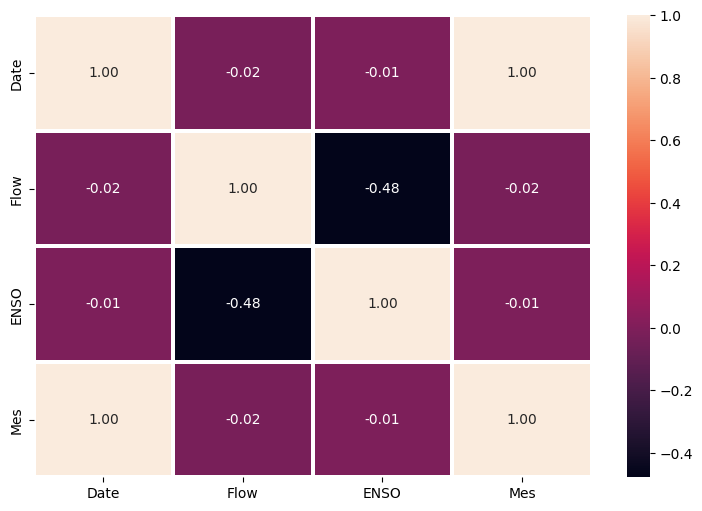

In [13]:
corr = serie.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

### Relacion entre ENSO y Caudal

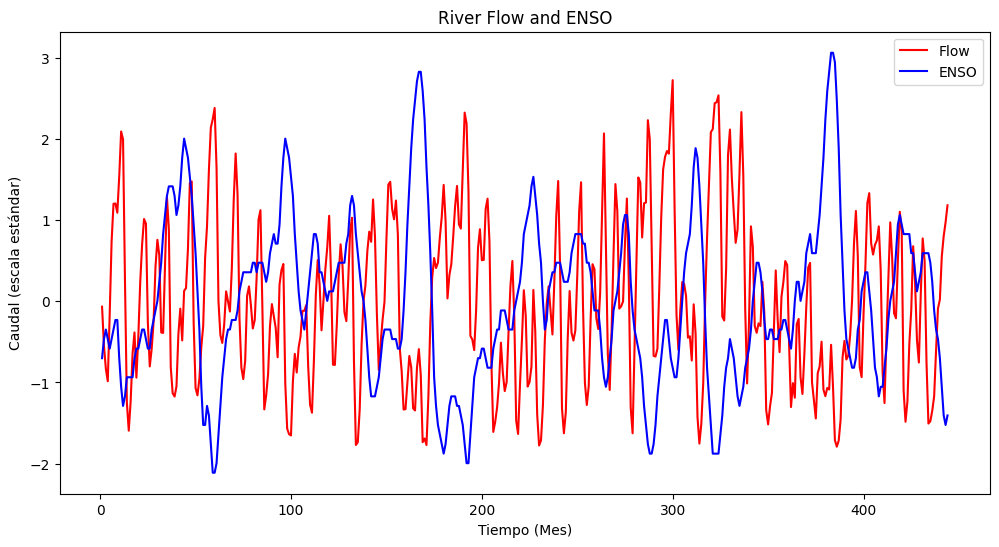

In [14]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  # Importa StandardScaler desde sklearn.preprocessing si no está ya importado

# Escala las series 'Flow' y 'ENSO' usando StandardScaler
scaler = StandardScaler()
scaled_flow = scaler.fit_transform(serie[['Flow']])
scaled_enso = scaler.fit_transform(serie[['ENSO']])

# Crea una figura y traza las series
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(serie['Mes'], scaled_flow, color='red', label='Flow')
ax.plot(serie['Mes'], scaled_enso, color='blue', label='ENSO')  # Usamos un color diferente (azul) para ENSO
ax.set_xlabel('Tiempo (Mes)')
ax.set_ylabel('Caudal (escala estándar)')
ax.legend()
ax.set_title('River Flow and ENSO')
ax.tick_params(axis='x', rotation=0)  # Rotate x-axis labels for readability
plt.show()


#### Lag a los datos

In [15]:
serie['Flow_lag'] = serie['Flow'].shift(1)
serie['ENSO_lag'] = serie['ENSO'].shift(1)

In [16]:
serie

,Date,Flow,ENSO,Mes,Flow_lag,ENSO_lag
0,1984-01-16 00:00:00,7046.387097,-0.6,1,NaN,NaN
1,1984-02-15 00:00:00,5769.344828,-0.4,2,7046.387097,-0.6
2,1984-03-16 00:00:00,5016.483871,-0.3,3,5769.344828,-0.4
3,1984-04-15 12:00:00,4613.266667,-0.4,4,5016.483871,-0.3
4,1984-05-16 00:00:00,6783.838710,-0.5,5,4613.266667,-0.4
...,...,...,...,...,...,...
439,2020-08-16 00:00:00,7277.535484,-0.6,440,6987.390323,-0.4
440,2020-09-15 12:00:00,8679.066667,-0.9,441,7277.535484,-0.6
441,2020-10-16 00:00:00,9349.567742,-1.2,442,8679.066667,-0.9
442,2020-11-15 12:00:00,9804.350000,-1.3,443,9349.567742,-1.2


In [17]:
serie.at[0, 'Flow_lag'] = 7490.387
#serie.at[0, 'ENSO_lag'] = -0.8
#serie.at[1, 'ENSO_lag'] = -1
serie.at[0, 'ENSO_lag'] = -0.9



In [18]:
serie

,Date,Flow,ENSO,Mes,Flow_lag,ENSO_lag
0,1984-01-16 00:00:00,7046.387097,-0.6,1,7490.387000,-0.9
1,1984-02-15 00:00:00,5769.344828,-0.4,2,7046.387097,-0.6
2,1984-03-16 00:00:00,5016.483871,-0.3,3,5769.344828,-0.4
3,1984-04-15 12:00:00,4613.266667,-0.4,4,5016.483871,-0.3
4,1984-05-16 00:00:00,6783.838710,-0.5,5,4613.266667,-0.4
...,...,...,...,...,...,...
439,2020-08-16 00:00:00,7277.535484,-0.6,440,6987.390323,-0.4
440,2020-09-15 12:00:00,8679.066667,-0.9,441,7277.535484,-0.6
441,2020-10-16 00:00:00,9349.567742,-1.2,442,8679.066667,-0.9
442,2020-11-15 12:00:00,9804.350000,-1.3,443,9349.567742,-1.2


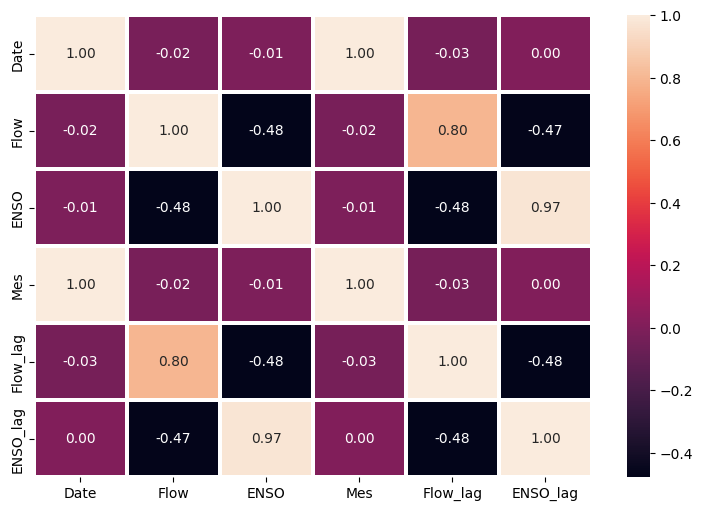

In [19]:
corr = serie.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

In [20]:
serie_ARIMA= serie[['Flow', 'Mes']].copy()


In [21]:
serie_ARIMA

,Flow,Mes
0,7046.387097,1
1,5769.344828,2
2,5016.483871,3
3,4613.266667,4
4,6783.838710,5
...,...,...
439,7277.535484,440
440,8679.066667,441
441,9349.567742,442
442,9804.350000,443


### Auto Correlation function (ACF) and Partial Autocorrelation Funcion(PACF).

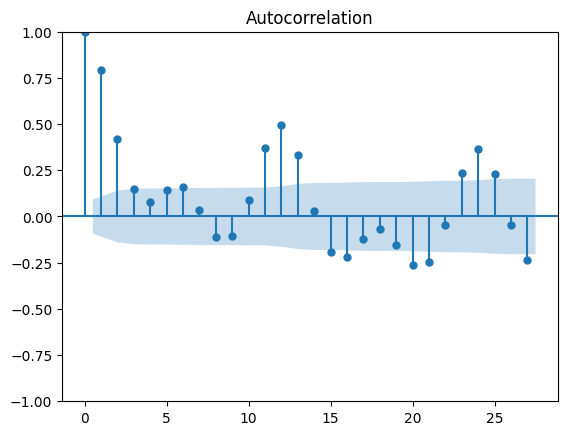

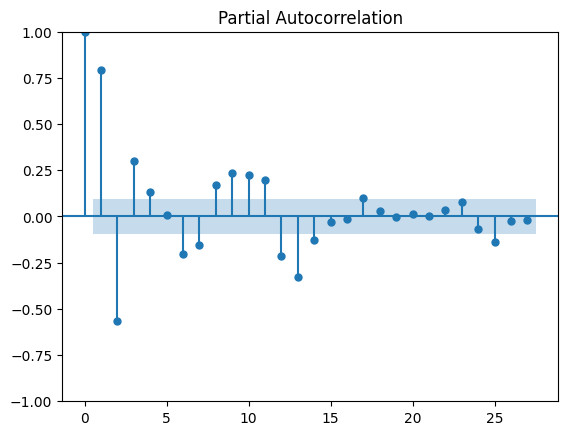

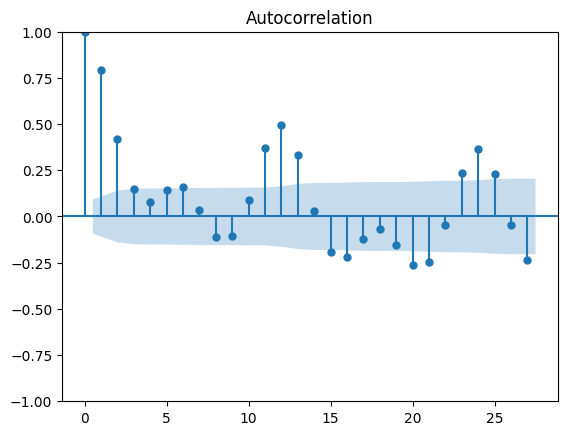

In [22]:
plot_pacf(serie_ARIMA['Flow'])
plot_acf(serie_ARIMA['Flow'])

In [23]:
#Function to know stacionality

def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios (Stationary)")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos son no estacionarios (Non Stationary)")

In [24]:
Prueba_Dickey_Fuller(serie_ARIMA['Flow'],"Flow")

Resultados de la prueba de Dickey-Fuller para columna: Flow
Test Statistic                         -5.555584
p-value                                 0.000002
No Lags Used                           13.000000
Número de observaciones utilizadas    430.000000
Critical Value (1%)                    -3.445649
Critical Value (5%)                    -2.868285
Critical Value (10%)                   -2.570363
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios (Stationary)


In [25]:
# Convertir 'Flow' y 'Mes' en arreglos NumPy y luego aplicar reshape
"""target = serie['Flow'].values.reshape(-1, 1)
data = serie['Mes'].values.reshape(-1, 1)"""

"target = serie['Flow'].values.reshape(-1, 1)\ndata = serie['Mes'].values.reshape(-1, 1)"

### Datos de Entrenamiento y Prueba

In [26]:
size = int(len(serie) * 0.8)

In [27]:
data_train = serie[serie.Mes <= size]
data_test  = serie[serie.Mes > size]

In [28]:
#X_train = np.array(data_train.Mes)[:, None] # vector-columna

#X_train = np.array(data_train[['Mes', 'ENSO']])
#X_train = np.array(data_train[['Flow_lag']])
X_train = np.array(data_train[['Flow_lag', 'ENSO_lag']])

y_train = np.array(data_train.Flow)

#X_test = np.array(data_test.Mes)[:, None] # vector-columna
X_test = np.array(data_test[['Flow_lag', 'ENSO_lag']])
y_test = np.array(data_test.Flow)

X_all = np.array(serie[['Flow_lag', 'ENSO_lag']])


In [29]:
len(y_test)

89

## Metricas

In [30]:
# Calculo de Metricas
def metricas(y_test,y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

    # Calcular el RRMSE directamente
    rrmse = np.sqrt(np.mean((y_test - y_pred) ** 2)) / np.mean(y_test)
    print(f"RRMSE: {rrmse:.2f}")

    # Calcular R-squared
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared (R^2): {r2:.2f}")

    # Calcular el NSE (coeficiente de eficiencia Nash-Sutcliffe)
    nse = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
    print(f"NSE (Nash-Sutcliffe Efficiency): {nse:.2f}")


## ARIMA

In [31]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

# Load dataset

# Split into train and test sets
X = serie_ARIMA['Flow'].values
train, test = X[:size], X[size:]



In [32]:
import pmdarima as pm

model_1 = pm.auto_arima(X, start_p=1, start_q=0,
                      test='adf',
                      max_p=5, max_q=0,
                      m=1,
                      d=None,
                      seasonal=False,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model_1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7865.329, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9208.012, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7777.791, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=7662.598, Time=0.10 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=7641.101, Time=0.14 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=7639.764, Time=0.17 sec


 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=7603.639, Time=0.15 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=7601.648, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=7606.573, Time=0.09 sec

Best model:  ARIMA(4,0,0)(0,0,0)[0] intercept
Total fit time: 0.926 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  444
Model:               SARIMAX(4, 0, 0)   Log Likelihood               -3794.824
Date:                Tue, 03 Oct 2023   AIC                           7601.648
Time:                        22:59:24   BIC                           7626.223
Sample:                             0   HQIC                          7611.340
                                - 444                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------

In [33]:
orden_ar=(5, 0, 0)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  355
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -3036.744
Date:                Tue, 03 Oct 2023   AIC                           6087.488
Time:                        22:59:24   BIC                           6114.593
Sample:                             0   HQIC                          6098.271
                                - 355                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7413.0301    367.764     20.157      0.000    6692.227    8133.834
ar.L1          1.4205      0.057     24.728      0.000       1.308       1.533
ar.L2         -0.8886      0.095     -9.400      0.0

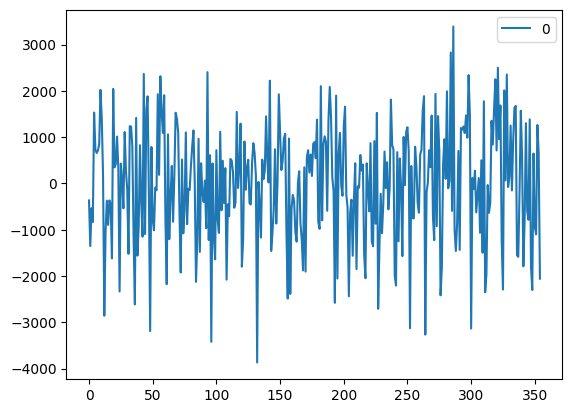

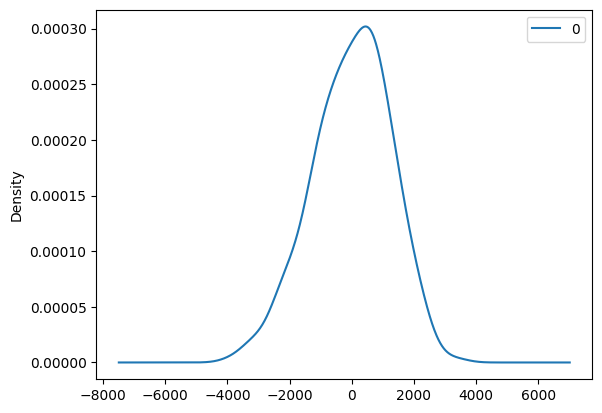

                 0
count   355.000000
mean     -5.996724
std    1254.328712
min   -3866.216294
25%    -843.690613
50%      66.530667
75%     869.953976
max    3390.829384


In [34]:
# fit model
model = ARIMA(train, order=orden_ar)
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


## Funcion ARIMA

In [36]:

def ARIMA_estimador(serie_ARIMA, orden):
    # Split into train and test sets
    predictions = []
    residuales = []
    X = serie_ARIMA['Flow'].values
    size = int(len(X) * 0.8)
    train, test = X[:size], X[size:]

    history = [x for x in train]
    
    # Walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=orden)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        #print('Month=%s, Predicted=%f, Expected=%f' % (serie_ARIMA['Mes'].iloc[size + t], yhat, obs))

    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=orden)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        residuales.append(obs-yhat)

    fig = plt.figure(figsize=(12, 6))
    plt.plot(serie_ARIMA['Mes'].iloc[size:], test, marker='o', linestyle='', label='Actual')
    plt.plot(serie_ARIMA['Mes'].iloc[size:], predictions, color='red', label='Predicted')
    plt.xlabel('Tiempo (Mes)')
    plt.ylabel('Caudal (m3/s)')
    plt.legend()
    plt.title('River Flow Forecast')
    plt.xticks(rotation=0)
    plt.show()


    # Evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)

    # Plot forecasts against actual outcomes
    fig = plt.figure(figsize=(12, 6))
    plt.plot(serie_ARIMA['Mes'].iloc[size:], residuales, color='red', label='Residuales')
    plt.xlabel('Tiempo (Mes)')
    plt.ylabel('Caudal (m3/s)')
    plt.legend()
    plt.title('Residuales obtenidos')
    plt.xticks(rotation=0)  # Rotate x-axis labels for readability
    plt.show()
    
    
    return predictions, residuales


## Modelos lineales
Entre los modelos lineales se encuentran: autoregressive (AR), moving average (MA), and autoregressive moving average (ARMA)

### AR

In [37]:
import pmdarima as pm

model_1 = pm.auto_arima(X, start_p=1, start_q=0,
                      test='adf',
                      max_p=5, max_q=0,
                      m=1,
                      d=None,
                      seasonal=False,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model_1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7865.329, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9208.012, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7777.791, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=7662.598, Time=0.09 sec


 ARIMA(4,0,0)(0,0,0)[0]             : AIC=7641.101, Time=0.15 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=7639.764, Time=0.14 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=7603.639, Time=0.14 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=7601.648, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=7606.573, Time=0.08 sec

Best model:  ARIMA(4,0,0)(0,0,0)[0] intercept
Total fit time: 0.827 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  444
Model:               SARIMAX(4, 0, 0)   Log Likelihood               -3794.824
Date:                Tue, 03 Oct 2023   AIC                           7601.648
Time:                        22:59:26   BIC                           7626.223
Sample:                             0   HQIC                          7611.340
                                - 444                                         
Covariance Type:                  opg   

In [38]:
orden_ar=(5, 0, 0)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  355
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -3036.744
Date:                Tue, 03 Oct 2023   AIC                           6087.488
Time:                        22:59:26   BIC                           6114.593
Sample:                             0   HQIC                          6098.271
                                - 355                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7413.0301    367.764     20.157      0.000    6692.227    8133.834
ar.L1          1.4205      0.057     24.728      0.000       1.308       1.533
ar.L2         -0.8886      0.095     -9.400      0.0

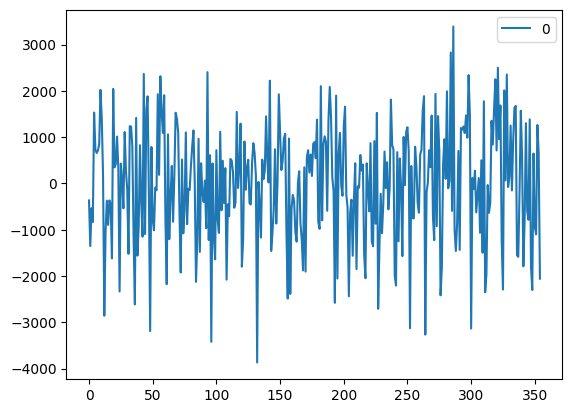

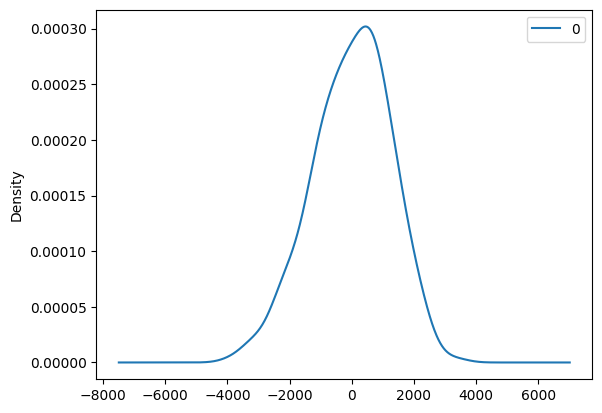

                 0
count   355.000000
mean     -5.996724
std    1254.328712
min   -3866.216294
25%    -843.690613
50%      66.530667
75%     869.953976
max    3390.829384


In [39]:
# fit model
model = ARIMA(train, order=orden_ar)
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

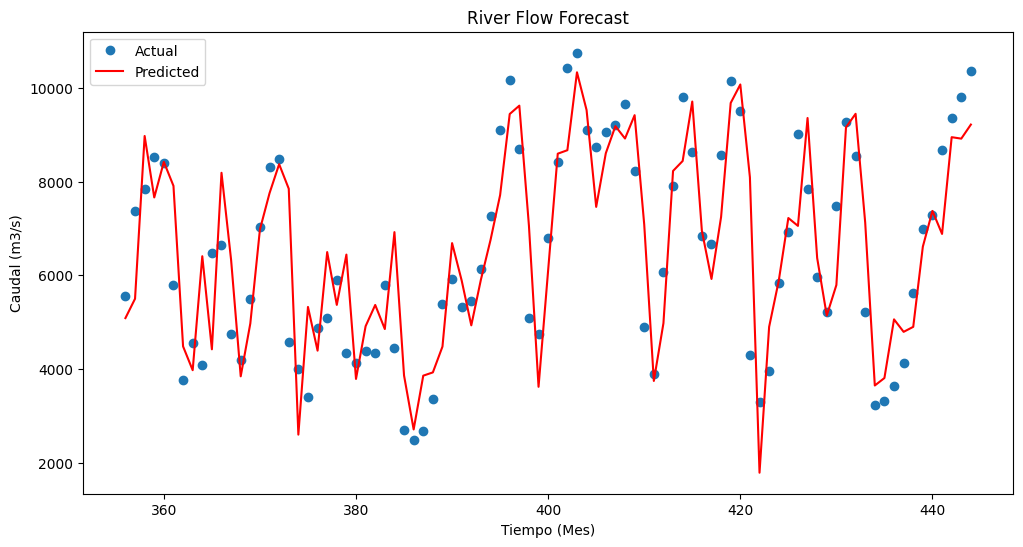

Test RMSE: 1216.840


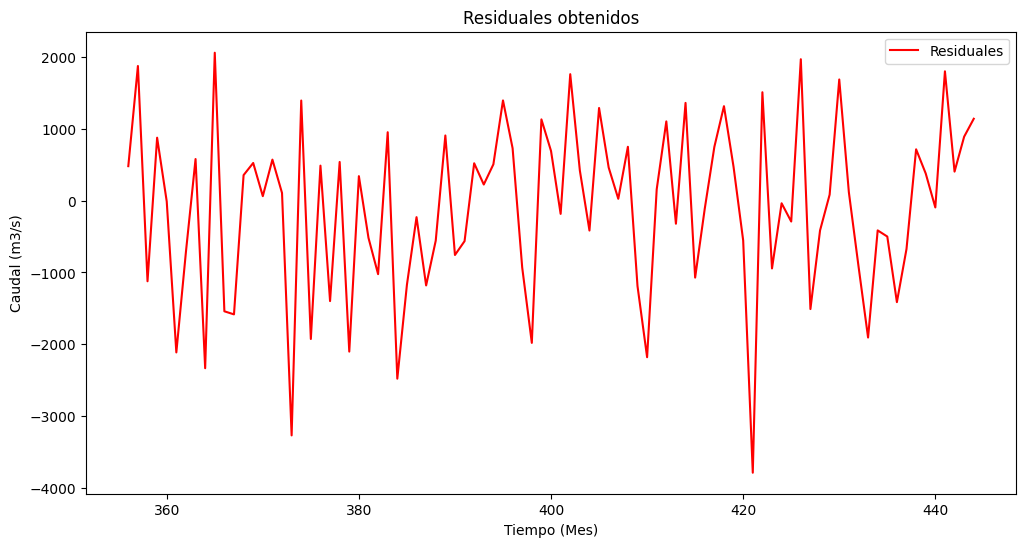

In [40]:
predictions = []
residuales = []
orden_ar= (5,0,0)

predictions_AR, residuales_AR = ARIMA_estimador(serie_ARIMA, orden_ar)

In [41]:
metricas(y_test, predictions_AR)

RMSE: 1216.84
MAE: 968.17
RRMSE: 0.19
R-squared (R^2): 0.70
NSE (Nash-Sutcliffe Efficiency): 0.70


### ARMA

In [42]:
import pmdarima as pm

model_1 = pm.auto_arima(X, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,
                      d=None,
                      seasonal=False,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model_1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7727.800, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9208.012, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7865.329, Time=0.02 sec


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7724.921, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7777.791, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=7640.387, Time=0.33 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=7662.598, Time=0.07 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=7641.410, Time=0.24 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=7605.158, Time=0.66 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.70 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.69 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=7555.284, Time=0.74 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.56 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=7557.907, Time=0.77 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=7560.306, Time=0.90 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.58 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=7525.732, Time=1.04 sec
 ARIMA(5,0,4)(0,0,0)[0]            

In [43]:
orden_arma=(3, 0, 3)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  355
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -2997.559
Date:                Tue, 03 Oct 2023   AIC                           6011.118
Time:                        23:00:14   BIC                           6042.094
Sample:                             0   HQIC                          6023.441
                                - 355                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7413.0298    497.511     14.900      0.000    6437.925    8388.134
ar.L1          1.7600      0.048     36.386      0.000       1.665       1.855
ar.L2         -1.7533      0.050    -34.982      0.0

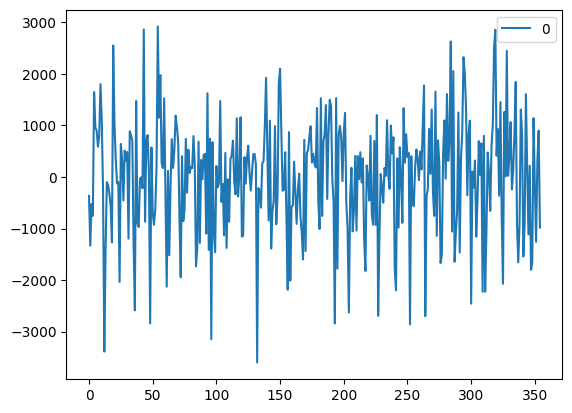

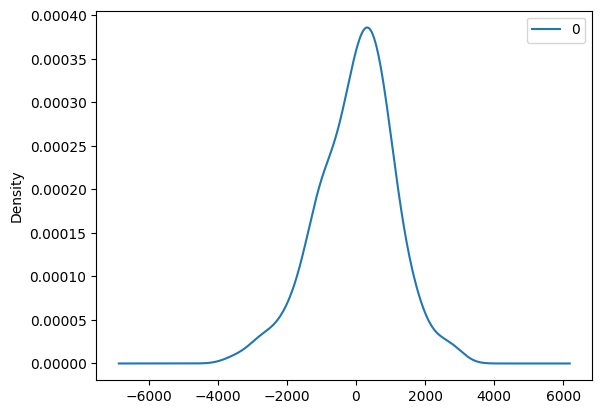

                 0
count   355.000000
mean     -4.070046
std    1119.383301
min   -3600.255485
25%    -732.651711
50%     109.265873
75%     728.571345
max    2922.233298


In [44]:
# fit model
model = ARIMA(train, order=orden_arma)
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [45]:
serie_ARIMA

,Flow,Mes
0,7046.387097,1
1,5769.344828,2
2,5016.483871,3
3,4613.266667,4
4,6783.838710,5
...,...,...
439,7277.535484,440
440,8679.066667,441
441,9349.567742,442
442,9804.350000,443


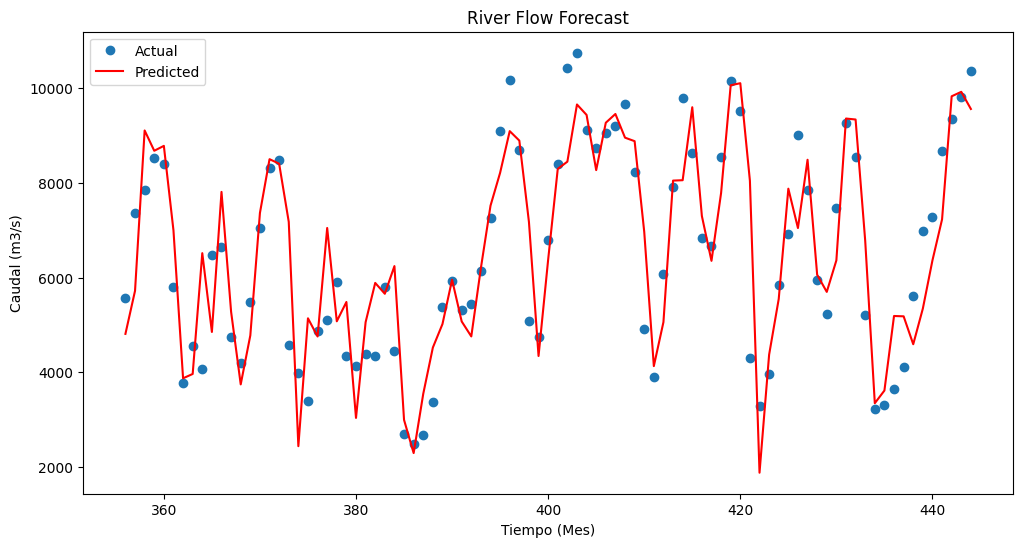

Test RMSE: 1096.834


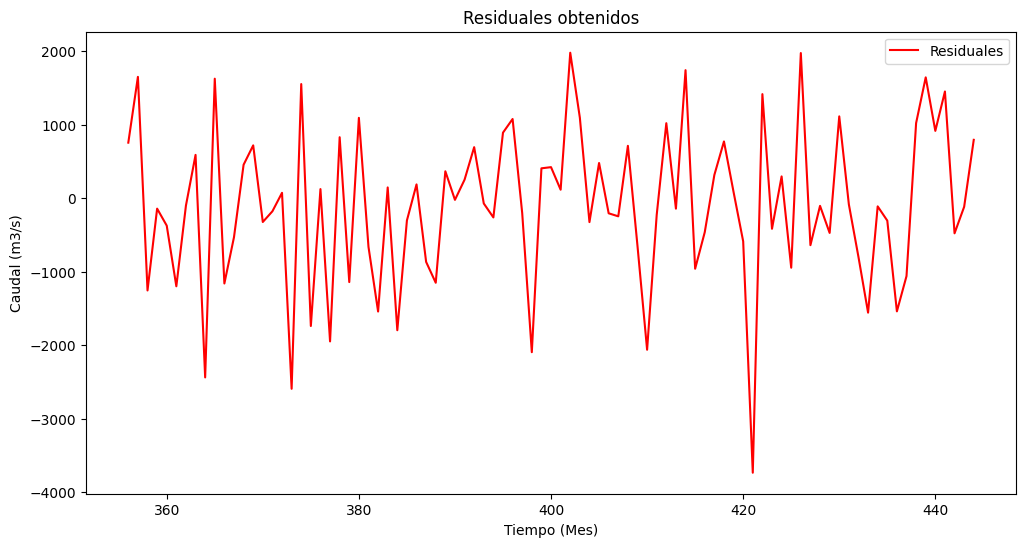

In [46]:
predictions_ARMA, residuales_ARMA = ARIMA_estimador(serie_ARIMA, orden_arma)

In [47]:
metricas(y_test, predictions_ARMA)

RMSE: 1096.83
MAE: 845.08
RRMSE: 0.17
R-squared (R^2): 0.75
NSE (Nash-Sutcliffe Efficiency): 0.75


## Ridge

In [48]:
from sklearn.linear_model import Ridge


# Definir el conjunto de hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0],
}

# Crear el pipeline con MinMaxScaler y Ridge
pipe = make_pipeline(MinMaxScaler(), Ridge())

# Realizar la búsqueda en cuadrícula
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1, param_grid={'ridge__alpha': [0.1, 1.0, 10.0]},
             scoring='r2')

In [49]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('ridge', Ridge(alpha=0.1))])


In [50]:
y_pred = grid.predict(X_test)
print("Training-set score: {:.2f}".format(grid.score(X_train, y_train)))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

# Calculo de Metricas

metricas(y_test, y_pred)

Training-set score: 0.64
Test-set score: 0.59
RMSE: 1423.44
MAE: 1130.75
RRMSE: 0.22
R-squared (R^2): 0.59
NSE (Nash-Sutcliffe Efficiency): 0.59


## Lasso

In [51]:
from sklearn.linear_model import Lasso


# Definir el conjunto de hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'lasso__alpha': [0.1, 1.0, 10.0],
}

# Crear el pipeline con MinMaxScaler y Lasso
pipe = make_pipeline(MinMaxScaler(), Lasso())

# Realizar la búsqueda en cuadrícula
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=-1, param_grid={'lasso__alpha': [0.1, 1.0, 10.0]},
             scoring='r2')

In [52]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('lasso', Lasso(alpha=0.1))])


In [53]:
y_pred = grid.predict(X_test)
print("Training-set score: {:.2f}".format(grid.score(X_train, y_train)))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

# Calculo de Metricas

metricas(y_test, y_pred)

Training-set score: 0.64
Test-set score: 0.59
RMSE: 1424.01
MAE: 1130.71
RRMSE: 0.22
R-squared (R^2): 0.59
NSE (Nash-Sutcliffe Efficiency): 0.59


## Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [55]:
pipe = make_pipeline(StandardScaler(), RandomForestRegressor())
param_grid = {'randomforestregressor__max_depth': [2,3,4],
              'randomforestregressor__n_estimators': [400],
              'randomforestregressor__max_leaf_nodes': [2,4,6,8],
              'randomforestregressor__min_samples_split': [2,5,10,15]}

RF = GridSearchCV(pipe, param_grid, scoring='r2', cv=5, n_jobs=-1)
RF.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [2, 3, 4],
                         'randomforestregressor__max_leaf_nodes': [2, 4, 6, 8],
                         'randomforestregressor__min_samples_split': [2, 5, 10,
                                                                      15],
                         'randomforestregressor__n_estimators': [400]},
             scoring='r2')

In [56]:
print("Best estimator:\n{}".format(RF.best_estimator_))

Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=4, max_leaf_nodes=8,
                                       min_samples_split=5,
                                       n_estimators=400))])


In [57]:
print("Training-set score: {:.2f}".format(RF.score(X_train, y_train)))
print("Test-set score: {:.2f}".format(RF.score(X_test, y_test)))


Training-set score: 0.69
Test-set score: 0.53


In [58]:
res_RF_train = y_train-RF.predict(X_train)

y_pred = RF.predict(X_test)
res_RF_test= y_test-y_pred

In [59]:
y_tree = RF.predict(X_all)

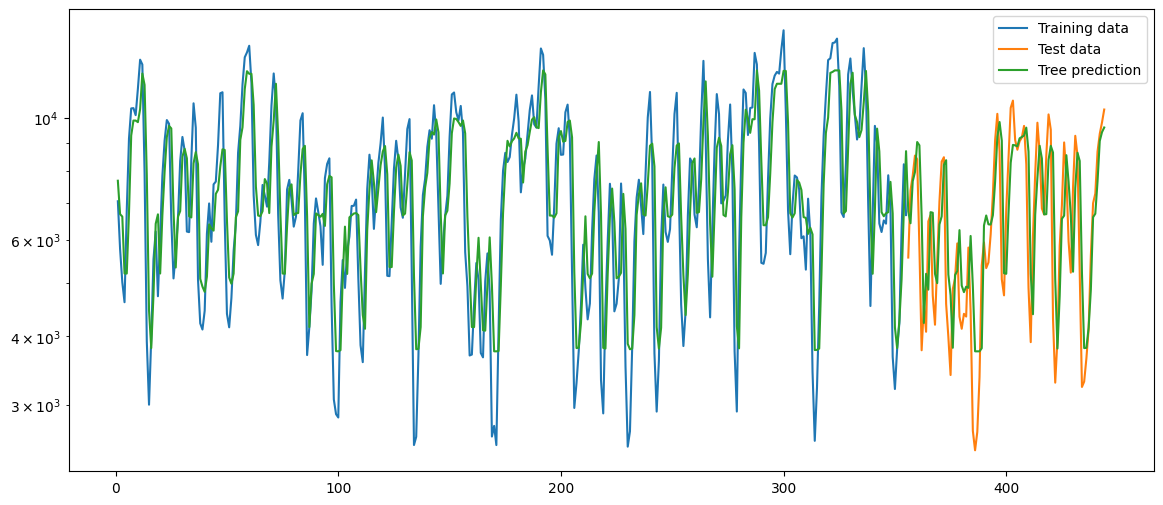

In [60]:
plt.figure(figsize=(14,6))
plt.semilogy(data_train.Mes, data_train.Flow, label="Training data")
plt.semilogy(data_test.Mes, data_test.Flow, label="Test data")
plt.semilogy(serie.Mes, y_tree, label="Tree prediction")
plt.legend();

### Metricas

In [61]:
# Calculo de Metricas

metricas(y_test, y_pred)


RMSE: 1515.90
MAE: 1179.60
RRMSE: 0.23
R-squared (R^2): 0.53
NSE (Nash-Sutcliffe Efficiency): 0.53


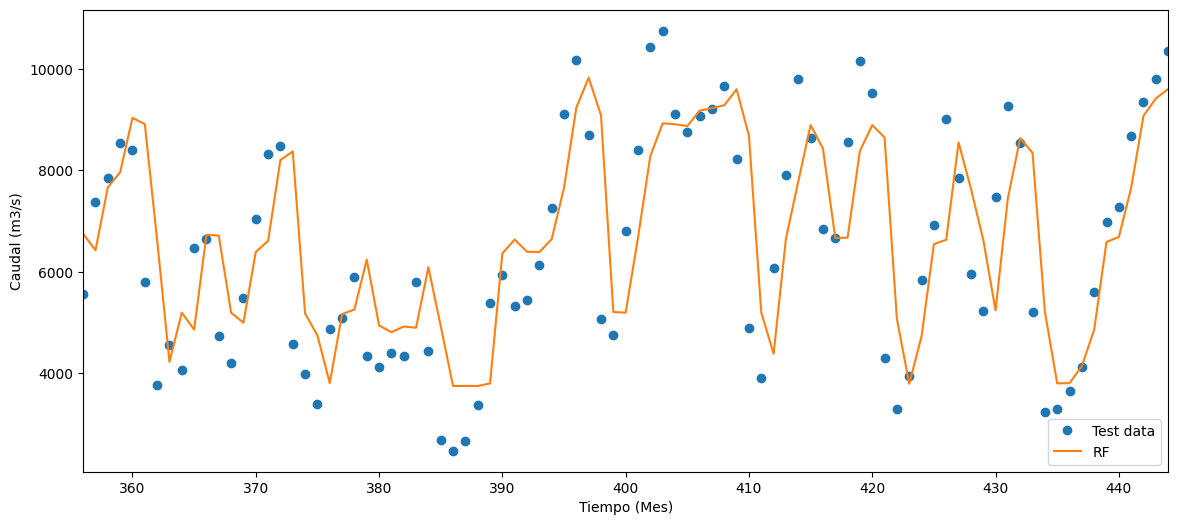

In [62]:
fig = plt.figure(figsize=(14, 6))
plt.plot(data_test.Mes, y_test, marker='o', linestyle='', label="Test data")
plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y

plt.xlim(data_test.Mes.min(), data_test.Mes.max())

plt.show()

## k-NN regresor

In [63]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

In [65]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [66]:
param_grid = {'kneighborsregressor__n_neighbors': [1,2,4,6,8,10,15,20,30,40]}

In [67]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__n_neighbors': [1, 2, 4, 6, 8, 10,
                                                              15, 20, 30, 40]},
             scoring='r2')

In [68]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=15))])


In [69]:
y_pred = grid.predict(X_test)

In [70]:
print("Training-set score: {:.2f}".format(grid.score(X_train, y_train)))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Training-set score: 0.66
Test-set score: 0.53


In [71]:
# Calculo de Metricas

metricas(y_test, y_pred)


RMSE: 1514.89
MAE: 1174.65
RRMSE: 0.23
R-squared (R^2): 0.53
NSE (Nash-Sutcliffe Efficiency): 0.53


## SVR

In [72]:
from sklearn.svm import SVR

In [73]:
param_grid = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svr__epsilon': [0.001, 0.01,0.1, 0.2, 0.5, 1]
}

In [74]:
pipe = make_pipeline(MinMaxScaler(), SVR())

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svr__epsilon': [0.001, 0.01, 0.1, 0.2, 0.5, 1],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='r2')

In [75]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svr', SVR(C=100, epsilon=0.001))])


In [76]:
y_pred = grid.predict(X_test)

In [77]:
# Calculo de Metricas

metricas(y_test, y_pred)


RMSE: 1624.98
MAE: 1303.93
RRMSE: 0.25
R-squared (R^2): 0.46
NSE (Nash-Sutcliffe Efficiency): 0.46


## Redes Neuronales

In [78]:
tf.saved_model.LoadOptions(
    allow_partial_checkpoint=False,
    experimental_io_device='/localhost',
    experimental_skip_checkpoint=False,
    experimental_variable_policy=None,
)


In [92]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model

model.save('model.h5')
model = load_model('model.h5')

scaler = MinMaxScaler()

# Define el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1])),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])

# Compila el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Define el pipeline con transformador de escala y modelo
pipeline = Pipeline([
    ('scaler', scaler),
    ('model', model)
])

# Define el target transformer para manejar las transformaciones inversas en las predicciones
target_transformer = TransformedTargetRegressor(regressor=pipeline, transformer=scaler)

model.save('model')

# Define el callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrena el modelo utilizando el pipeline y el target transformer
history = target_transformer.fit(X_train, y_train, model_epochs=100,
                        model_batch_size=64, model_validation_split=0.2, model_callbacks=[early_stopping])

# Evalúa el modelo en datos de prueba
y_pred = target_transformer.predict(X_test)


# Grafica los resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Datos reales', marker='o', linestyle='' )
plt.plot(y_pred, label='Predicciones')
plt.legend()
plt.show()


INFO:tensorflow:Assets written to: model\assets
INFO:tensorflow:Assets written to: ram://e1b158ad-d610-4ec9-a318-27f32d126cea/assets


FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://85f3f720-39c2-4498-9af4-0bc207ef233e/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [ ]:
metricas(y_test, y_pred)

## Modelo Hibrido


### Random Forest con modelos lineales 
Entre los modelos lineales se encuentran: autoregressive (AR), moving average (MA), and autoregressive moving average (ARMA)

Para medir el rendimiento de todos los modelos desarrollados de manera cualitativa, los valores de RRMSE (Error Cuadrático Medio Raíz Relativo) se categorizaron de la siguiente manera:
* Excelente: 0% < RRMSE < 10%
* Bueno: 10% < RRMSE < 20%
* Regular: 20% < RRMSE < 30%
* Malo: RRMSE > 30%


### AR-RF

In [ ]:
residuales_test_lag = np.roll(residuales_AR, shift=1)
residuales_test_extra = np.column_stack((residuales_test_lag, X_test))

Text(0, 0.5, 'Caudal (m3/s)')

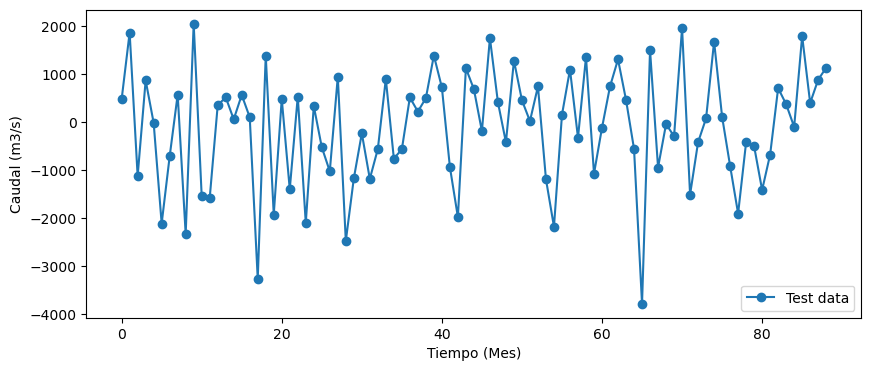

In [ ]:
fig = plt.figure(figsize=(10, 4))
plt.plot(residuales_AR, marker='o', label="Test data")
#plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y


In [ ]:
best_order = orden_ar
history = [x for x in train]
model = ARIMA(history, order=best_order)
model_fit = model.fit()

residuals_train = model_fit.resid

residuales_train_lag = np.roll(residuals_train, shift=1)
#residuales_train_extra = residuales_train_lag
residuales_train_extra = np.column_stack((residuales_train_lag, X_train))

In [ ]:
residuales_train_extra

array([[-2.05548235e+03,  7.49038700e+03, -9.00000000e-01],
       [-3.66642956e+02,  7.04638710e+03, -6.00000000e-01],
       [-1.35158224e+03,  5.76934483e+03, -4.00000000e-01],
       ...,
       [-1.09798020e+03,  4.22893333e+03, -3.00000000e-01],
       [ 1.26295867e+03,  6.25893548e+03, -4.00000000e-01],
       [ 6.62281918e+02,  8.22893333e+03, -4.00000000e-01]])

Text(0, 0.5, 'Caudal (m3/s)')

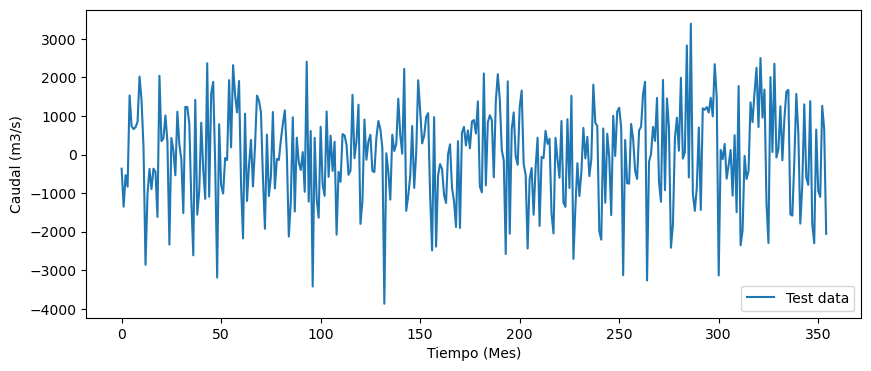

In [ ]:
fig = plt.figure(figsize=(10, 4))
plt.plot(residuals_train, label="Test data")
#plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y



In [ ]:
pipe = make_pipeline(StandardScaler(), RandomForestRegressor())
param_grid = {'randomforestregressor__max_depth': [2,3,4],
              'randomforestregressor__n_estimators': [400],
              'randomforestregressor__max_leaf_nodes': [2,4,6,8],
              'randomforestregressor__min_samples_split': [2,5,10,15]}

RF_e = GridSearchCV(pipe, param_grid, scoring='r2', cv=5, n_jobs=-1)
RF_e.fit(residuales_train_extra, residuals_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [2, 3, 4],
                         'randomforestregressor__max_leaf_nodes': [2, 4, 6, 8],
                         'randomforestregressor__min_samples_split': [2, 5, 10,
                                                                      15],
                         'randomforestregressor__n_estimators': [400]},
             scoring='r2')

In [ ]:
print("Best estimator:\n{}".format(RF_e.best_estimator_))

Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=4, max_leaf_nodes=8,
                                       min_samples_split=15,
                                       n_estimators=400))])


In [ ]:
y_pred = RF_e.predict(residuales_test_extra)

In [ ]:
"""plt.figure(figsize=(14,6))
plt.plot(residuals_train, label="Training data")
#plt.plot(residuales_AR, label="Test data")
plt.plot(y_tree, label="Tree prediction")
plt.legend();

"""

'plt.figure(figsize=(14,6))\nplt.plot(residuals_train, label="Training data")\n#plt.plot(residuales_AR, label="Test data")\nplt.plot(y_tree, label="Tree prediction")\nplt.legend();\n\n'

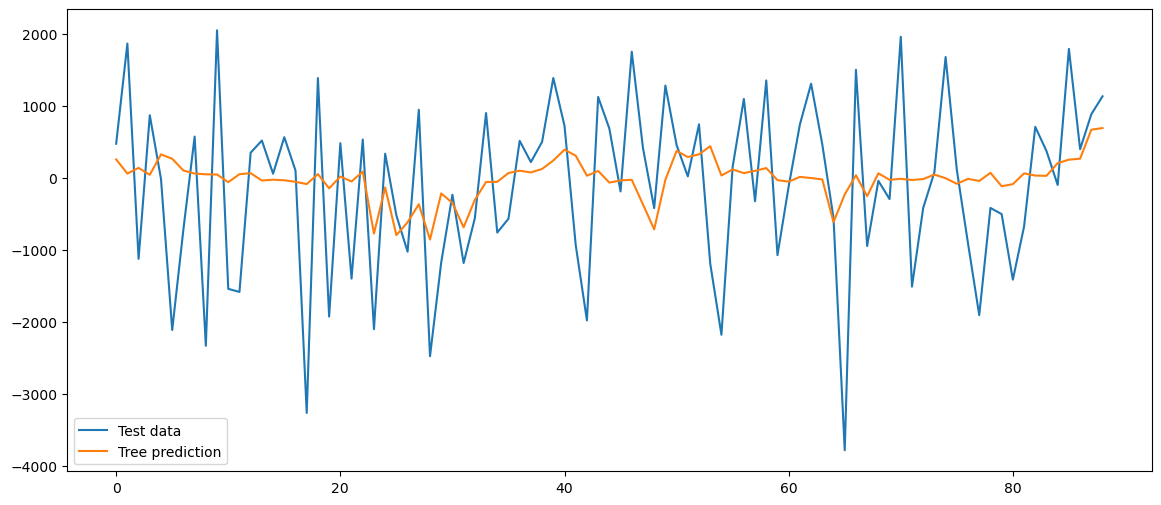

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(residuales_AR, label="Test data")
plt.plot(y_pred, label="Tree prediction")
plt.legend();


In [ ]:
metricas(residuales_AR, y_pred)


RMSE: 1152.27
MAE: 892.95
RRMSE: -9.59
R-squared (R^2): 0.09
NSE (Nash-Sutcliffe Efficiency): 0.09


In [ ]:
print("Training-set score: {:.2f}".format(RF_e.score(residuales_train_extra, residuals_train)))
print("Test-set score: {:.2f}".format(RF_e.score(residuales_test_extra, residuales_AR)))


Training-set score: 0.24
Test-set score: 0.09


In [ ]:
y_residual = RF_e.predict(residuales_test_extra)

y_AR_RF = predictions_AR + y_residual


In [ ]:
print(y_residual)

[ 2.59531980e+02  6.18885882e+01  1.41677013e+02  4.54682516e+01
  3.29224265e+02  2.68654668e+02  1.04926251e+02  6.32444460e+01
  5.24657999e+01  4.93538998e+01 -5.72221327e+01  5.41418419e+01
  6.80481501e+01 -3.41527071e+01 -2.26300458e+01 -3.06711490e+01
 -5.21785900e+01 -8.33145578e+01  5.49256872e+01 -1.42632061e+02
  2.13706493e+01 -4.71647384e+01  9.03829092e+01 -7.71353515e+02
 -1.30069962e+02 -7.93376683e+02 -6.14644980e+02 -3.63931909e+02
 -8.54623365e+02 -2.13069138e+02 -3.45167055e+02 -6.84897006e+02
 -3.02710881e+02 -5.42839284e+01 -5.21223414e+01  7.04551974e+01
  1.02720530e+02  7.83058144e+01  1.27076617e+02  2.43952041e+02
  3.95087390e+02  3.11276789e+02  3.27500615e+01  9.93927244e+01
 -6.27986011e+01 -3.21455774e+01 -2.43458846e+01 -3.66409996e+02
 -7.12526873e+02 -2.28033349e+01  3.78005574e+02  2.92637996e+02
  3.30042785e+02  4.43152405e+02  3.58851863e+01  1.20100586e+02
  6.86637275e+01  1.01184700e+02  1.39133191e+02 -2.88427914e+01
 -4.93247528e+01  1.65181

In [ ]:
metricas(test, y_AR_RF)

RMSE: 1152.27
MAE: 892.95
RRMSE: 0.18
R-squared (R^2): 0.73
NSE (Nash-Sutcliffe Efficiency): 0.73


### ARMA-RF

In [ ]:
residuales_test_lag = np.roll(residuales_ARMA, shift=1)
residuales_test_extra = np.column_stack((residuales_test_lag, X_test))

Text(0, 0.5, 'Caudal (m3/s)')

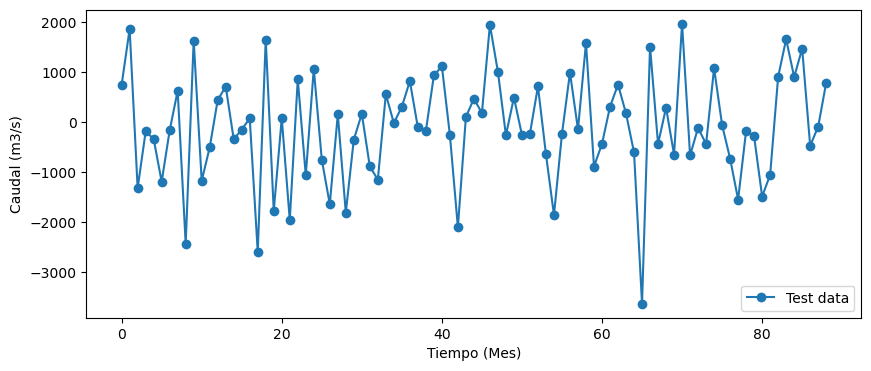

In [ ]:
fig = plt.figure(figsize=(10, 4))
plt.plot(residuales_ARMA, marker='o', label="Test data")
#plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y


In [ ]:
best_order = orden_arma
history = [x for x in train]
model = ARIMA(history, order=best_order)
model_fit = model.fit()

residuals_train = model_fit.resid

residuales_train_lag = np.roll(residuals_train, shift=1)
#residuales_train_extra = residuales_train_lag
residuales_train_extra = np.column_stack((residuales_train_lag, X_train))

In [ ]:
residuales_train_extra

array([[-9.94157806e+02,  7.49038700e+03, -9.00000000e-01],
       [-3.66642695e+02,  7.04638710e+03, -6.00000000e-01],
       [-1.33388939e+03,  5.76934483e+03, -4.00000000e-01],
       ...,
       [-1.25863757e+03,  4.22893333e+03, -3.00000000e-01],
       [ 3.43174554e+02,  6.25893548e+03, -4.00000000e-01],
       [ 9.18299617e+02,  8.22893333e+03, -4.00000000e-01]])

Text(0, 0.5, 'Caudal (m3/s)')

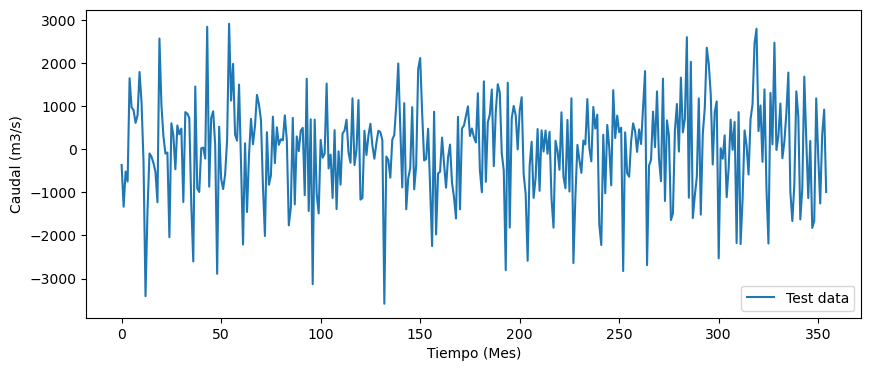

In [ ]:
fig = plt.figure(figsize=(10, 4))
plt.plot(residuals_train, label="Test data")
#plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y



In [ ]:
pipe = make_pipeline(StandardScaler(), RandomForestRegressor())
param_grid = {'randomforestregressor__max_depth': [2,3,4],
              'randomforestregressor__n_estimators': [400],
              'randomforestregressor__max_leaf_nodes': [2,4,6,8],
              'randomforestregressor__min_samples_split': [2,5,10,15]}

RF_e = GridSearchCV(pipe, param_grid, scoring='r2', cv=5, n_jobs=-1)
RF_e.fit(residuales_train_extra, residuals_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [2, 3, 4],
                         'randomforestregressor__max_leaf_nodes': [2, 4, 6, 8],
                         'randomforestregressor__min_samples_split': [2, 5, 10,
                                                                      15],
                         'randomforestregressor__n_estimators': [400]},
             scoring='r2')

In [ ]:
print("Best estimator:\n{}".format(RF_e.best_estimator_))

Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=4, max_leaf_nodes=8,
                                       min_samples_split=15,
                                       n_estimators=400))])


In [ ]:
y_pred = RF_e.predict(residuales_test_extra)

In [ ]:
"""plt.figure(figsize=(14,6))
plt.plot(residuals_train, label="Training data")
#plt.plot(residuales_AR, label="Test data")
plt.plot(y_tree, label="Tree prediction")
plt.legend();

"""

'plt.figure(figsize=(14,6))\nplt.plot(residuals_train, label="Training data")\n#plt.plot(residuales_AR, label="Test data")\nplt.plot(y_tree, label="Tree prediction")\nplt.legend();\n\n'

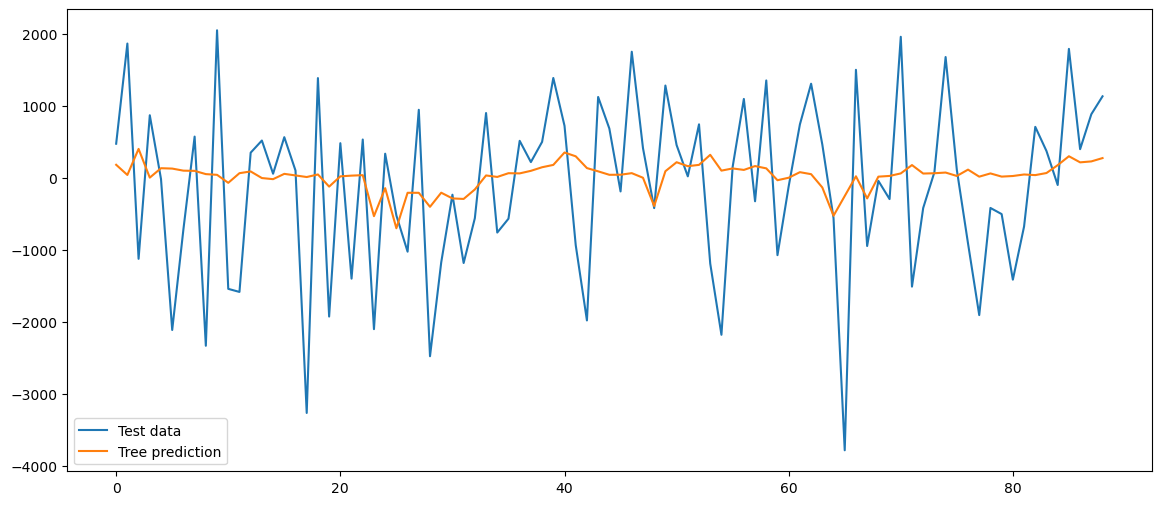

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(residuales_AR, label="Test data")
plt.plot(y_pred, label="Tree prediction")
plt.legend();


In [ ]:
metricas(residuales_AR, y_pred)


RMSE: 1176.38
MAE: 915.65
RRMSE: -9.79
R-squared (R^2): 0.06
NSE (Nash-Sutcliffe Efficiency): 0.06


In [ ]:
print("Training-set score: {:.2f}".format(RF_e.score(residuales_train_extra, residuals_train)))
print("Test-set score: {:.2f}".format(RF_e.score(residuales_test_extra, residuales_AR)))


Training-set score: 0.24
Test-set score: 0.06


In [ ]:
y_residual = RF_e.predict(residuales_test_extra)

y_ARMA_RF = predictions_ARMA + y_residual


In [ ]:
print(y_residual)

[ 1.84821367e+02  4.35355523e+01  4.05765126e+02  6.53786622e+00
  1.37228455e+02  1.32106740e+02  1.03221378e+02  1.00214873e+02
  5.51002347e+01  4.52435152e+01 -6.59351909e+01  6.80731364e+01
  9.23060521e+01  4.67244243e-01 -1.49637645e+01  5.87442066e+01
  3.68111416e+01  1.46603940e+01  5.03211911e+01 -1.18432445e+02
  2.40036660e+01  3.41734097e+01  4.03797770e+01 -5.29388502e+02
 -1.39907472e+02 -6.97689884e+02 -2.04370357e+02 -2.04631681e+02
 -3.99528348e+02 -2.03202682e+02 -2.82822163e+02 -2.89918170e+02
 -1.58290442e+02  3.65770724e+01  1.59700713e+01  6.78343423e+01
  6.52245030e+01  1.00758828e+02  1.50673955e+02  1.83195402e+02
  3.55691538e+02  3.02656899e+02  1.38933619e+02  9.37009391e+01
  4.56147573e+01  4.67090564e+01  6.85794940e+01  4.58895146e+00
 -3.89112312e+02  9.53537099e+01  2.20437165e+02  1.65484740e+02
  1.83611479e+02  3.23495851e+02  1.03714865e+02  1.33986858e+02
  1.13632809e+02  1.66923055e+02  1.35160428e+02 -2.98113760e+01
  4.83774184e+00  8.20979

In [ ]:
metricas(test, y_ARMA_RF)

RMSE: 1055.94
MAE: 813.05
RRMSE: 0.16
R-squared (R^2): 0.77
NSE (Nash-Sutcliffe Efficiency): 0.77


### AR-ANN

Text(0, 0.5, 'Caudal (m3/s)')

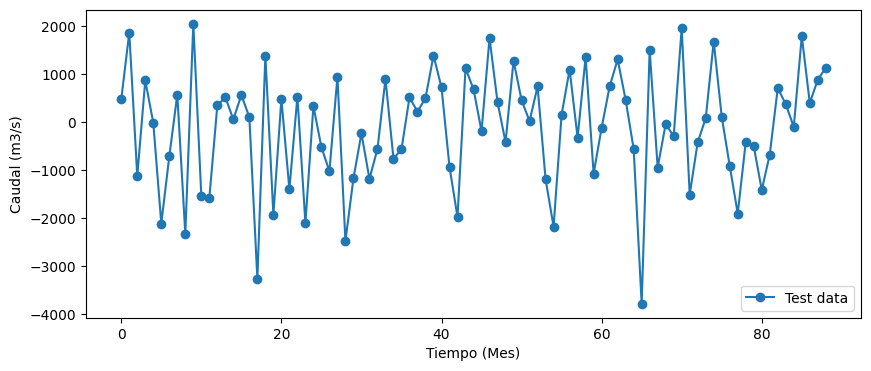

In [82]:
fig = plt.figure(figsize=(10, 4))
plt.plot(residuales_AR, marker='o', label="Test data")
#plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y


In [83]:
best_order = orden_ar
history = [x for x in train]
model = ARIMA(history, order=best_order)
model_fit = model.fit()

residuals_train = model_fit.resid

residuales_train_lag = np.roll(residuals_train, shift=1)
#residuales_train_extra = residuales_train_lag
residuales_train_extra = np.column_stack((residuales_train_lag, X_train))

In [84]:
residuales_train_extra

array([[-2.05548235e+03,  7.49038700e+03, -9.00000000e-01],
       [-3.66642956e+02,  7.04638710e+03, -6.00000000e-01],
       [-1.35158224e+03,  5.76934483e+03, -4.00000000e-01],
       ...,
       [-1.09798020e+03,  4.22893333e+03, -3.00000000e-01],
       [ 1.26295867e+03,  6.25893548e+03, -4.00000000e-01],
       [ 6.62281918e+02,  8.22893333e+03, -4.00000000e-01]])

Text(0, 0.5, 'Caudal (m3/s)')

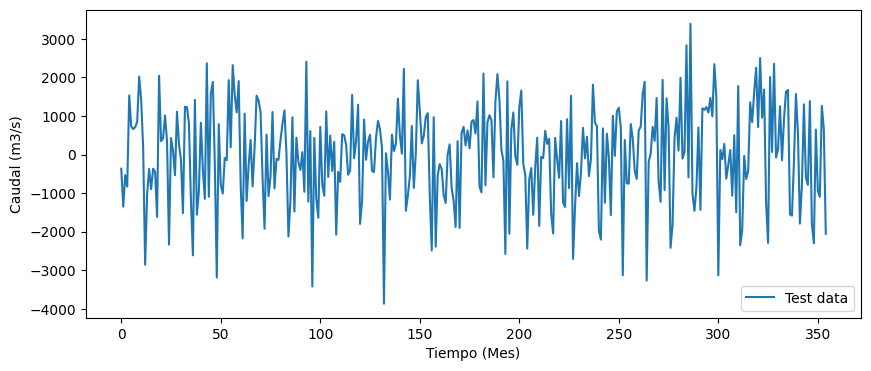

In [85]:
fig = plt.figure(figsize=(10, 4))
plt.plot(residuals_train, label="Test data")
#plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y



In [88]:
scaler = MinMaxScaler()

# Define el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Input(shape=(residuales_train_extra.shape[1])),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])

# Compila el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Define el pipeline con transformador de escala y modelo
pipeline = Pipeline([
    ('scaler', scaler),
    ('model', model)
])

# Define el target transformer para manejar las transformaciones inversas en las predicciones
target_transformer = TransformedTargetRegressor(regressor=pipeline, transformer=scaler)

# Define el callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrena el modelo utilizando el pipeline y el target transformer
history = target_transformer.fit(residuales_train_extra, residuals_train, model__epochs=1000,
                        model__batch_size=32, model__validation_split=0.2, model__callbacks=[early_stopping])

# Evalúa el modelo en datos de prueba
y_pred_NN = target_transformer.predict(residuales_test_extra)
#mse = mean_squared_error(residuales, y_pred_NN)
print("Error cuadrático medio en datos de prueba:", mse)


# Grafica los resultados
plt.figure(figsize=(10, 6))
plt.plot(residuales_ARMA, label='Datos reales', marker='o', linestyle='' )
plt.plot(y_pred_NN, label='Predicciones')
plt.legend()
plt.show()

INFO:tensorflow:Assets written to: ram://28f8ad9a-9d37-47bb-8526-8faa3c9f9c6b/assets


FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://27939671-03db-4bf3-bfb7-7860a60a3cee/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

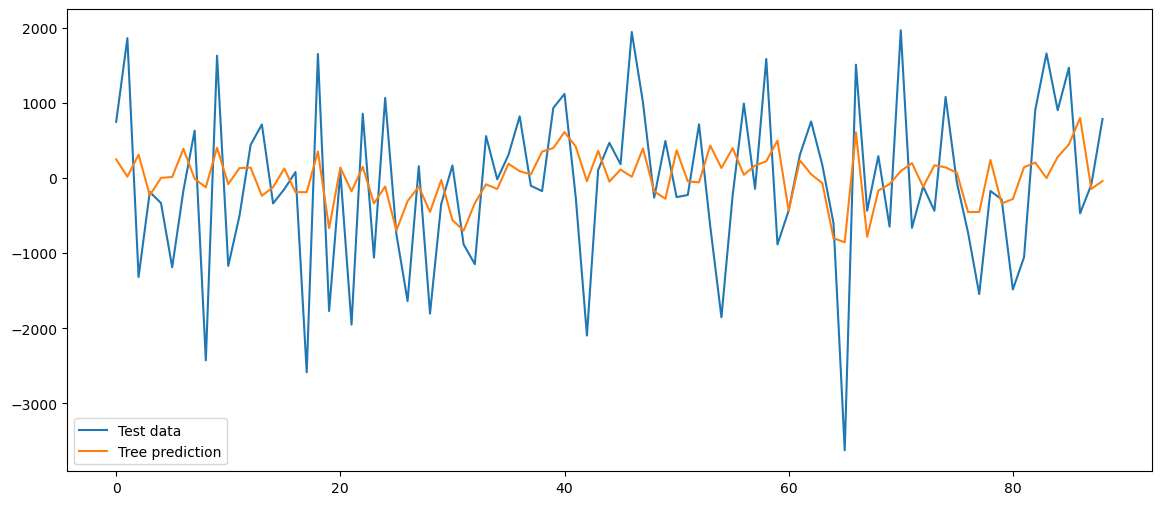

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(residuales_AR, label="Test data")
plt.plot(y_pred_NN, label="Tree prediction")
plt.legend();


In [ ]:
metricas(residuales_AR, y_pred)


RMSE: 1055.94
MAE: 813.05
RRMSE: -11.24
R-squared (R^2): 0.05
NSE (Nash-Sutcliffe Efficiency): 0.05


In [ ]:

y_AR_NN = predictions_AR + y_pred_NN


In [ ]:
print(y_residual)

[ 187.55923613  103.39822764  356.35263815   70.56797972  136.27114048
  119.33447323  119.12742801  113.62009047   98.84615396   49.08717088
  -19.50298123   66.93356542   76.98005152    8.22941368   -3.948112
   57.80783093   29.03923304   -9.56950883   61.67029023 -124.25005846
   39.50519814   28.08133356   32.97679249 -462.59844649 -129.43085711
 -665.23691874 -197.19006264 -186.23387094 -340.52611976 -185.09875623
 -265.73974643 -294.7285865  -185.37177944   16.78094053   16.82745865
   86.16304346  123.65589256  175.64067945  161.24636987  182.28724559
  296.26520312  224.40545985  132.58465007  108.43558177   54.2106994
   63.44301846   78.09579774   -8.92995939 -335.49643782   89.54648965
  198.82079101  179.40444674  199.74785347  264.33869278  136.21149033
  140.77625352  115.15575591  204.27358417  135.07918743  -14.26096215
   13.63165571   78.30953367   62.91683982 -115.9108225  -494.24290731
 -199.07041672   33.20502893 -256.15965865   12.05404252   32.1947274
   49.2430

In [ ]:
metricas(test, y_AR_NN)

RMSE: 987.88
MAE: 775.17
RRMSE: 0.15
R-squared (R^2): 0.80
NSE (Nash-Sutcliffe Efficiency): 0.80


### ARMA-ANN

Text(0, 0.5, 'Caudal (m3/s)')

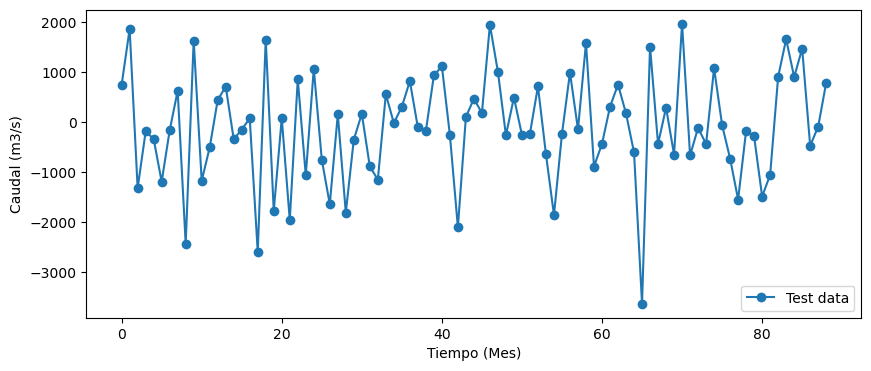

In [ ]:
fig = plt.figure(figsize=(10, 4))
plt.plot(residuales_ARMA, marker='o', label="Test data")
#plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y


In [ ]:
best_order = orden_arma
history = [x for x in train]
model = ARIMA(history, order=best_order)
model_fit = model.fit()

residuals_train = model_fit.resid

residuales_train_lag = np.roll(residuals_train, shift=1)
#residuales_train_extra = residuales_train_lag
residuales_train_extra = np.column_stack((residuales_train_lag, X_train))

In [ ]:
residuales_train_extra

array([[-9.94157806e+02,  7.49038700e+03, -9.00000000e-01],
       [-3.66642695e+02,  7.04638710e+03, -6.00000000e-01],
       [-1.33388939e+03,  5.76934483e+03, -4.00000000e-01],
       ...,
       [-1.25863757e+03,  4.22893333e+03, -3.00000000e-01],
       [ 3.43174554e+02,  6.25893548e+03, -4.00000000e-01],
       [ 9.18299617e+02,  8.22893333e+03, -4.00000000e-01]])

Text(0, 0.5, 'Caudal (m3/s)')

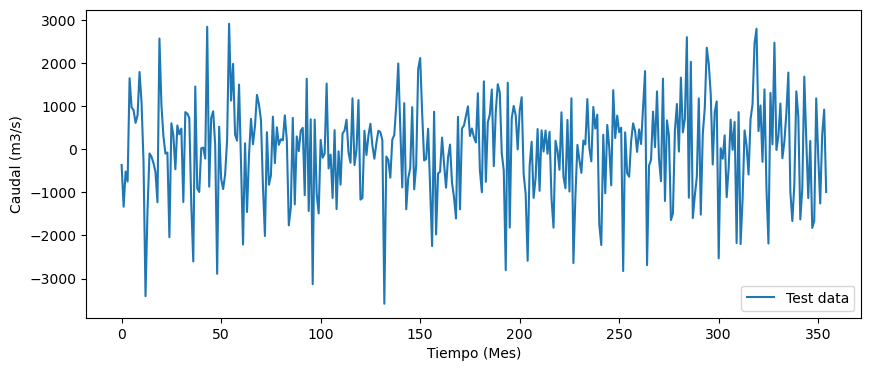

In [ ]:
fig = plt.figure(figsize=(10, 4))
plt.plot(residuals_train, label="Test data")
#plt.plot(data_test.Mes, y_pred, label="RF")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

# Agregamos nombres a los ejes
plt.xlabel("Tiempo (Mes)")  # Nombre del eje x
plt.ylabel("Caudal (m3/s)")  # Nombre del eje y



Epoch 1/1000
9/9 [==============================] - 0s 15ms/step - loss: 0.1971 - val_loss: 0.0907
Epoch 2/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.0474 - val_loss: 0.0571
Epoch 3/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.0501 - val_loss: 0.0557
Epoch 4/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.0417 - val_loss: 0.0548
Epoch 5/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.0400 - val_loss: 0.0546
Epoch 6/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.0383 - val_loss: 0.0513
Epoch 7/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.0375 - val_loss: 0.0506
Epoch 8/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.0366 - val_loss: 0.0504
Epoch 9/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.0360 - val_loss: 0.0499
Epoch 10/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.0353 - val_loss: 0.0489
Epoch 11/1000
9/9 

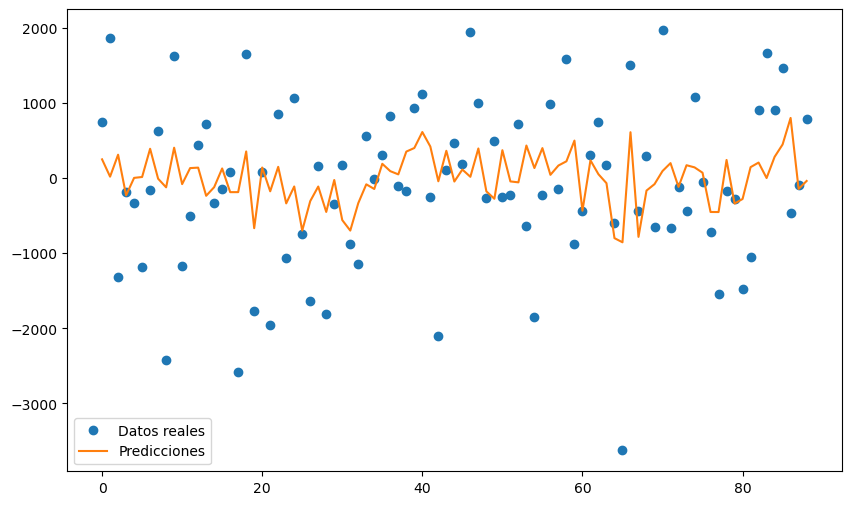

In [ ]:
scaler = MinMaxScaler()

# Define el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Input(shape=(residuales_train_extra.shape[1])),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])

# Compila el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Define el pipeline con transformador de escala y modelo
pipeline = Pipeline([
    ('scaler', scaler),
    ('model', model)
])

# Define el target transformer para manejar las transformaciones inversas en las predicciones
target_transformer = TransformedTargetRegressor(regressor=pipeline, transformer=scaler)

# Define el callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrena el modelo utilizando el pipeline y el target transformer
history = target_transformer.fit(residuales_train_extra, residuals_train, model__epochs=1000,
                        model__batch_size=32, model__validation_split=0.2, model__callbacks=[early_stopping])

# Evalúa el modelo en datos de prueba
y_pred_NN = target_transformer.predict(residuales_test_extra)
#mse = mean_squared_error(residuales, y_pred_NN)
print("Error cuadrático medio en datos de prueba:", mse)


# Grafica los resultados
plt.figure(figsize=(10, 6))
plt.plot(residuales_ARMA, label='Datos reales', marker='o', linestyle='' )
plt.plot(y_pred_NN, label='Predicciones')
plt.legend()
plt.show()

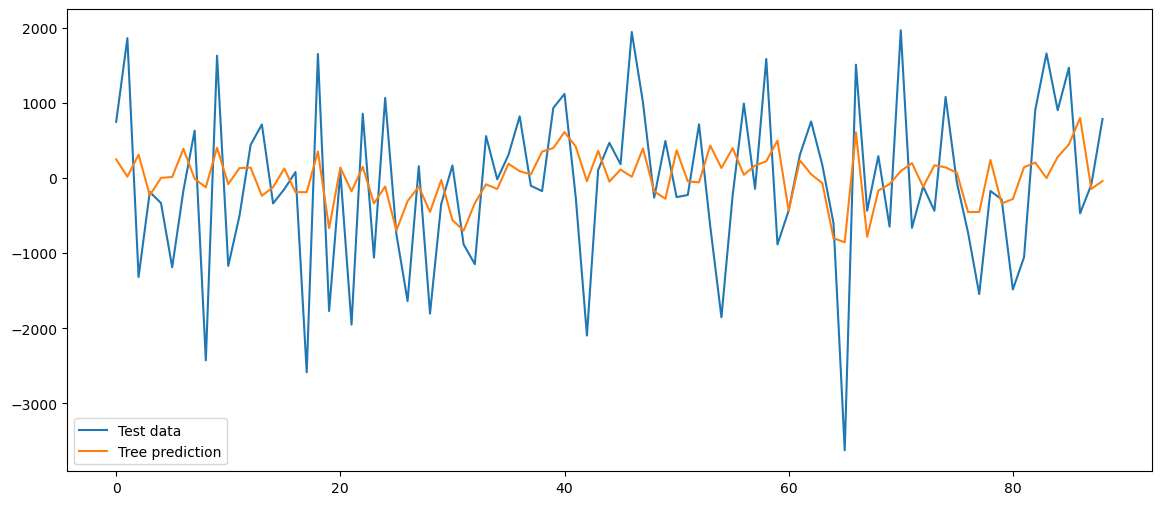

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(residuales_ARMA, label="Test data")
plt.plot(y_pred_NN, label="Tree prediction")
plt.legend();


In [ ]:
metricas(residuales_ARMA, y_pred)


RMSE: 1055.94
MAE: 813.05
RRMSE: -11.24
R-squared (R^2): 0.05
NSE (Nash-Sutcliffe Efficiency): 0.05


In [ ]:

y_ARMA_NN = predictions_ARMA + y_pred_NN


In [ ]:
print(y_residual)

[ 187.55923613  103.39822764  356.35263815   70.56797972  136.27114048
  119.33447323  119.12742801  113.62009047   98.84615396   49.08717088
  -19.50298123   66.93356542   76.98005152    8.22941368   -3.948112
   57.80783093   29.03923304   -9.56950883   61.67029023 -124.25005846
   39.50519814   28.08133356   32.97679249 -462.59844649 -129.43085711
 -665.23691874 -197.19006264 -186.23387094 -340.52611976 -185.09875623
 -265.73974643 -294.7285865  -185.37177944   16.78094053   16.82745865
   86.16304346  123.65589256  175.64067945  161.24636987  182.28724559
  296.26520312  224.40545985  132.58465007  108.43558177   54.2106994
   63.44301846   78.09579774   -8.92995939 -335.49643782   89.54648965
  198.82079101  179.40444674  199.74785347  264.33869278  136.21149033
  140.77625352  115.15575591  204.27358417  135.07918743  -14.26096215
   13.63165571   78.30953367   62.91683982 -115.9108225  -494.24290731
 -199.07041672   33.20502893 -256.15965865   12.05404252   32.1947274
   49.2430

In [ ]:
metricas(test, y_ARMA_NN)

RMSE: 987.88
MAE: 775.17
RRMSE: 0.15
R-squared (R^2): 0.80
NSE (Nash-Sutcliffe Efficiency): 0.80
